# Analyse tracks

This is the analysis notebook. All data preparation is done in `track_organoids.ipynb`. For each of the files listed in `files`, the following steps are performed:

 - load mean organoid statistics
 - compare mean velocities between experimental conditions

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statannot 

In [3]:
organoid_frame = pd.DataFrame()

In [13]:
path_to_imgs = '/Users/gustaveronteix/Documents/Code/Jaulinlab/Data/Clemence_project/masks_CNV029'

experiment_names = ['Coll_AIIB2',
                    'Coll_CT',
                    'PEG_CT']

for expname in experiment_names:
    path_name = os.path.join(path_to_imgs, 
                             expname, 
                             'organoid_statistics', 
                             'organoid_statistics.csv')

    df = pd.read_csv(path_name)
    df['experiment'] = expname

    organoid_frame = pd.concat([organoid_frame, df], ignore_index=True)

In [18]:
organoid_frame.columns

Index(['movie_name', 'particle', 'unique_organoid', 'velocity_std',
       'velocity_mean', 'perimeter', 'area', 'circularity',
       'cumulative_displacement', 'absolute_displacement', 'experiment'],
      dtype='object')

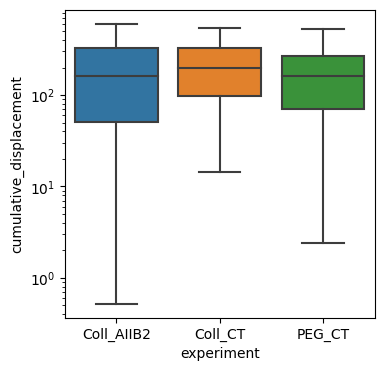

In [27]:
# boxplot comparing the velocity as a function of the experiment. Remove the outliers.
# compare statistical significance between the experiments using statannot

# put y axis in log scale

fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(x='experiment', 
    y='cumulative_displacement', 
    data=organoid_frame,
    ax=ax,
    showfliers=False)

ax.set_yscale('log')
plt.show()